In [409]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcbur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jcbur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Original Dataset (3 million rows)

        """
        # Loading the original dataset

        file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\twcs.csv
        data = pd.read_csv(file_path)

        # Sampling the data (creating a 20,000 rows subset)

        data = data.sample(n=20000, random_state=42)

        # Saving the sampled data to a new CSV file

        output_file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\sampled_data.csv'
        data.to_csv(output_file_path, index=False)
        """

# Workflow
- Data Exploration: Understanding the data structure, distributions, and potential issues.
- Missing Value Handling: Address missing data to avoid issues during model training.
- Correlation Analysis: Identify relationships between features to select or engineer useful features.
- Feature Engineering: Prepare data (e.g., text transformation, scaling, etc.)
- Model testing for Accuracy:
- Model Selection:
- Actionability: Predict Customer Sentiment to improve Customer Service Ratings

# The Dataset
- kaggle
- Data Source: Twitter.
- The original dataset contains over 2.9 million rows.
- A 20,000 rows sample has been created and saved as csv for better data manipulation.
- The dataset is distributed across 7 features

In [410]:
 # Load the sample-subset
file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\sampled_data.csv'
data = pd.read_csv(file_path)

# Exploration

    # Displaying the First 5 Rows

In [411]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,192624,161253,True,Wed Oct 04 13:59:33 +0000 2017,@161252 What's that egg website people talk about,192623,192625.0
1,738238,296574,True,Fri Oct 06 18:29:06 +0000 2017,Why!🤷🏻‍♀️ #iOS11 @AppleSupport https://t.co/BX...,738237,NaN
2,2414302,AppleSupport,False,Tue Nov 14 17:38:01 +0000 2017,@693975 We can assist you. We recommend updati...,2414303,2414304.0
3,1793929,539096,True,Thu Oct 12 06:04:41 +0000 2017,@331912 @115955 Thats better than having an un...,1793928,1793930.0
4,2088018,617376,True,Mon Nov 06 20:30:49 +0000 2017,@VirginAmerica is probably one of the best air...,2088017,NaN


    # Data types and non-null counts

In [412]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 20000 non-null  int64  
 1   author_id                20000 non-null  object 
 2   inbound                  20000 non-null  bool   
 3   created_at               20000 non-null  object 
 4   text                     20000 non-null  object 
 5   response_tweet_id        12513 non-null  object 
 6   in_response_to_tweet_id  14374 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 957.2+ KB
None


    # Data Statistics (numerical and categorical)

In [413]:
print(data.describe(include='all'))

            tweet_id   author_id inbound                      created_at  \
count   2.000000e+04       20000   20000                           20000   
unique           NaN       10829       2                           19940   
top              NaN  AmazonHelp    True  Tue Nov 21 03:40:08 +0000 2017   
freq             NaN        1181   10897                               2   
mean    1.503770e+06         NaN     NaN                             NaN   
std     8.606173e+05         NaN     NaN                             NaN   
min     1.620000e+02         NaN     NaN                             NaN   
25%     7.632560e+05         NaN     NaN                             NaN   
50%     1.508010e+06         NaN     NaN                             NaN   
75%     2.242719e+06         NaN     NaN                             NaN   
max     2.987822e+06         NaN     NaN                             NaN   

                       text response_tweet_id  in_response_to_tweet_id  
count         

    # Checking for duplicates

In [414]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


# Missing Values

    # Checking for missing values

In [415]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
tweet_id                      0
author_id                     0
inbound                       0
created_at                    0
text                          0
response_tweet_id          7487
in_response_to_tweet_id    5626
dtype: int64


    # Visualizing missing values

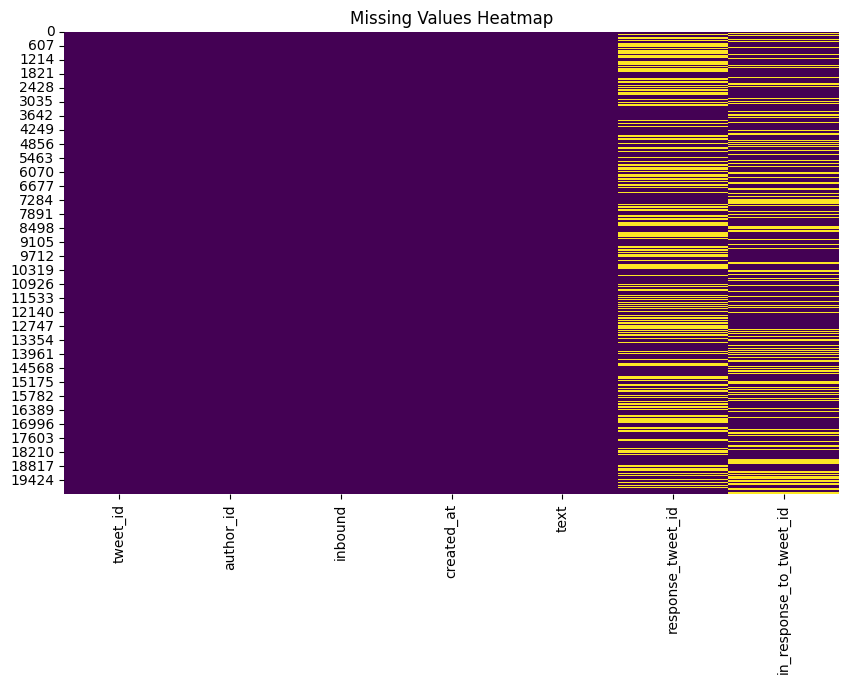

In [416]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

    # Handling missing values in the numerical column by imputing NaN with mean

In [417]:
imputer = SimpleImputer(strategy='mean')
data['in_response_to_tweet_id'] = imputer.fit_transform(data[['in_response_to_tweet_id']])

    # Visualizing the remaining missing values

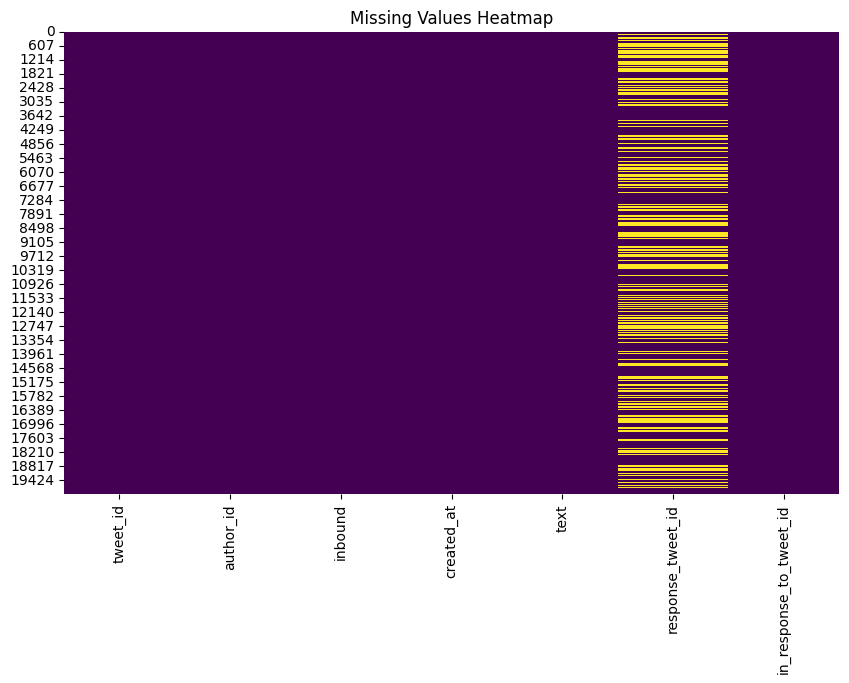

In [418]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 20000 non-null  int64  
 1   author_id                20000 non-null  object 
 2   inbound                  20000 non-null  bool   
 3   created_at               20000 non-null  object 
 4   text                     20000 non-null  object 
 5   response_tweet_id        12513 non-null  object 
 6   in_response_to_tweet_id  20000 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 957.2+ KB


# Data Transformation

    # Handling missing values in the mixed-datatype column by label encoding

In [420]:
label_encoder = LabelEncoder()
data['author_id_encoded'] = label_encoder.fit_transform(data['author_id'])
data['response_tweet_id_encoded'] = label_encoder.fit_transform(data['response_tweet_id'])
data['inbound_encoded'] = label_encoder.fit_transform(data['inbound'])
 

    # Dropping original (already transformed) features to avoid redundancy

In [421]:
data.drop(['response_tweet_id', 'author_id', 'inbound'], axis=1, inplace=True, errors='ignore')

    # Verifying that there are no redundacies  

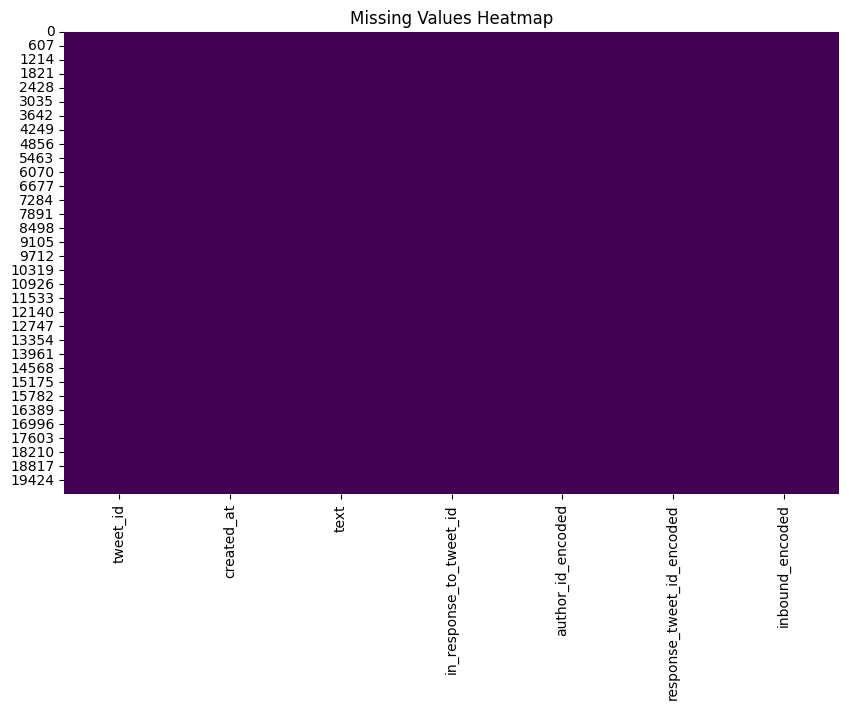

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tweet_id                   20000 non-null  int64  
 1   created_at                 20000 non-null  object 
 2   text                       20000 non-null  object 
 3   in_response_to_tweet_id    20000 non-null  float64
 4   author_id_encoded          20000 non-null  int32  
 5   response_tweet_id_encoded  20000 non-null  int32  
 6   inbound_encoded            20000 non-null  int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 937.6+ KB


In [422]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

data.info()

# Feature Engineering: 

    # Creating a 'sentiment' feature from the column 'text'

    # Text cleaning: converting to lowercase

In [423]:
data['cleaned_text'] = data['text'].str.lower()

    # Text cleaning: removing punctuation

In [424]:
data['cleaned_text'] = data['cleaned_text'].str.replace(r'[^\w\s]', '', regex=True)

    # Text cleaning: removing leading/trailing spaces

In [425]:
data['cleaned_text'] = data['cleaned_text'].str.strip()  

    # Using VADER sentiment analyzer to define sentiment polarity

In [426]:
analyzer = SentimentIntensityAnalyzer()
data['sentiment_polarity'] = data['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


    # Categorizing Sentiment

In [427]:
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply categorization
data['sentiment'] = data['sentiment_polarity'].apply(categorize_sentiment)


    # Encoding sentiment labels as numerical values

In [428]:
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

    # Dataframe after sentiment analysis

In [429]:
data.head()

,tweet_id,created_at,text,in_response_to_tweet_id,author_id_encoded,response_tweet_id_encoded,inbound_encoded,cleaned_text,sentiment_polarity,sentiment,sentiment_encoded
0,192624,Wed Oct 04 13:59:33 +0000 2017,@161252 What's that egg website people talk about,1.926250e+05,1080,4266,1,161252 whats that egg website people talk about,0.0000,Neutral,1
1,738238,Fri Oct 06 18:29:06 +0000 2017,Why!🤷🏻‍♀️ #iOS11 @AppleSupport https://t.co/BX...,1.464906e+06,3567,11272,1,why ios11 applesupport httpstcobxrvfeixxq,0.0000,Neutral,1
2,2414302,Tue Nov 14 17:38:01 +0000 2017,@693975 We can assist you. We recommend updati...,2.414304e+06,10732,6537,0,693975 we can assist you we recommend updating...,0.5362,Positive,2
3,1793929,Thu Oct 12 06:04:41 +0000 2017,@331912 @115955 Thats better than having an un...,1.793930e+06,7369,3694,1,331912 115955 thats better than having an unst...,0.1027,Positive,2
4,2088018,Mon Nov 06 20:30:49 +0000 2017,@VirginAmerica is probably one of the best air...,1.464906e+06,8251,5005,1,virginamerica is probably one of the best airl...,0.6369,Positive,2


    # Dropping sentiment processed features to avoid redundancy 

In [430]:
data.drop(['sentiment', 'cleaned_text', 'text', 'created_at'], axis=1, inplace=True, errors='ignore')

    # Final dataframe after sentiment analysis

In [431]:
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tweet_id                   20000 non-null  int64  
 1   in_response_to_tweet_id    20000 non-null  float64
 2   author_id_encoded          20000 non-null  int32  
 3   response_tweet_id_encoded  20000 non-null  int32  
 4   inbound_encoded            20000 non-null  int64  
 5   sentiment_polarity         20000 non-null  float64
 6   sentiment_encoded          20000 non-null  int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 859.5 KB


,tweet_id,in_response_to_tweet_id,author_id_encoded,response_tweet_id_encoded,inbound_encoded,sentiment_polarity,sentiment_encoded
0,192624,1.926250e+05,1080,4266,1,0.0000,1
1,738238,1.464906e+06,3567,11272,1,0.0000,1
2,2414302,2.414304e+06,10732,6537,0,0.5362,2
3,1793929,1.793930e+06,7369,3694,1,0.1027,2
4,2088018,1.464906e+06,8251,5005,1,0.6369,2


# Consolidating a sigle dataframe

    # Combine Numerical Features

In [432]:
numerical_features = data[['sentiment_encoded', 'inbound_encoded', 'in_response_to_tweet_id', 'author_id_encoded', 'response_tweet_id_encoded']].values

    # Ensure compatibility

In [433]:
numerical_features = np.array(numerical_features, dtype=np.float64)

    # Convert numerical features to a sparse matrix

In [434]:
numerical_features_sparse = csr_matrix(numerical_features)

In [435]:
# Step 2: Extract Numerical Features
numerical_features = data[['sentiment_encoded', 'inbound_encoded', 'in_response_to_tweet_id', 
                           'author_id_encoded', 'response_tweet_id_encoded']].values
numerical_features = np.array(numerical_features, dtype=np.float64)
numerical_features_sparse = csr_matrix(numerical_features)

In [436]:
# Step 3: Combine TF-IDF and Numerical Features
X_combined = hstack([text_features, numerical_features_sparse])



NameError: name 'text_features' is not defined

In [379]:
# Verify the dimensions of the combined feature matrix
print(f"Shape of TF-IDF features: {text_features.shape}")
print(f"Shape of numerical features: {numerical_features_sparse.shape}")
print(f"Shape of combined features: {X_combined.shape}")

NameError: name 'text_features' is not defined

    # Ensuring compatibility

In [269]:
numerical_features = np.array(numerical_features, dtype=np.float64)

    # Converting to sparse matrix

In [ ]:
numerical_features_sparse = csr_matrix(numerical_features)
X_combined = hstack([text_features, numerical_features_sparse])  # Convert sentiment_encoded to a sparse matrix
sentiment_feature = data[['sentiment_encoded']].values
sentiment_feature_sparse = csr_matrix(sentiment_feature)

# Combine TF-IDF features and sentiment feature
X_combined = hstack([text_features, sentiment_feature_sparse])

NameError: name 'text_features' is not defined

In [1129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tweet_id                   20000 non-null  int64  
 1   created_at                 20000 non-null  object 
 2   text                       20000 non-null  object 
 3   in_response_to_tweet_id    20000 non-null  float64
 4   author_id_encoded          20000 non-null  int32  
 5   response_tweet_id_encoded  20000 non-null  int32  
 6   inbound_encoded            20000 non-null  int64  
 7   cleaned_text               20000 non-null  object 
 8   sentiment_polarity         20000 non-null  float64
 9   sentiment                  20000 non-null  object 
 10  sentiment_encoded          20000 non-null  int32  
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 1.4+ MB


In [1130]:
data.head()

,tweet_id,created_at,text,in_response_to_tweet_id,author_id_encoded,response_tweet_id_encoded,inbound_encoded,cleaned_text,sentiment_polarity,sentiment,sentiment_encoded
0,192624,Wed Oct 04 13:59:33 +0000 2017,@161252 What's that egg website people talk about,1.926250e+05,1080,4266,1,161252 whats that egg website people talk about,0.0000,Neutral,1
1,738238,Fri Oct 06 18:29:06 +0000 2017,Why!🤷🏻‍♀️ #iOS11 @AppleSupport https://t.co/BX...,1.464906e+06,3567,11272,1,why ios11 applesupport httpstcobxrvfeixxq,0.0000,Neutral,1
2,2414302,Tue Nov 14 17:38:01 +0000 2017,@693975 We can assist you. We recommend updati...,2.414304e+06,10732,6537,0,693975 we can assist you we recommend updating...,0.5362,Positive,2
3,1793929,Thu Oct 12 06:04:41 +0000 2017,@331912 @115955 Thats better than having an un...,1.793930e+06,7369,3694,1,331912 115955 thats better than having an unst...,0.1027,Positive,2
4,2088018,Mon Nov 06 20:30:49 +0000 2017,@VirginAmerica is probably one of the best air...,1.464906e+06,8251,5005,1,virginamerica is probably one of the best airl...,0.6369,Positive,2


# Feature Selection & Importance with Random Forest

In [1131]:
# Defining the Y
y = data['inbound_encoded'].astype(int)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 8: Compute Feature Importances
feature_importances = rf.feature_importances_

# Combine TF-IDF feature names and other feature names
feature_names = list(tfidf.get_feature_names_out()) + ['inbound_encoded', 'in_response_to_tweet_id', 'author_id_encoded', 'response_tweet_id_encoded']
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualization of the top 20 most important features
top_features = importance_df.head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Features Selected by Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Display the top 20 features
importance_df.head(20)


ValueError: All arrays must be of the same length

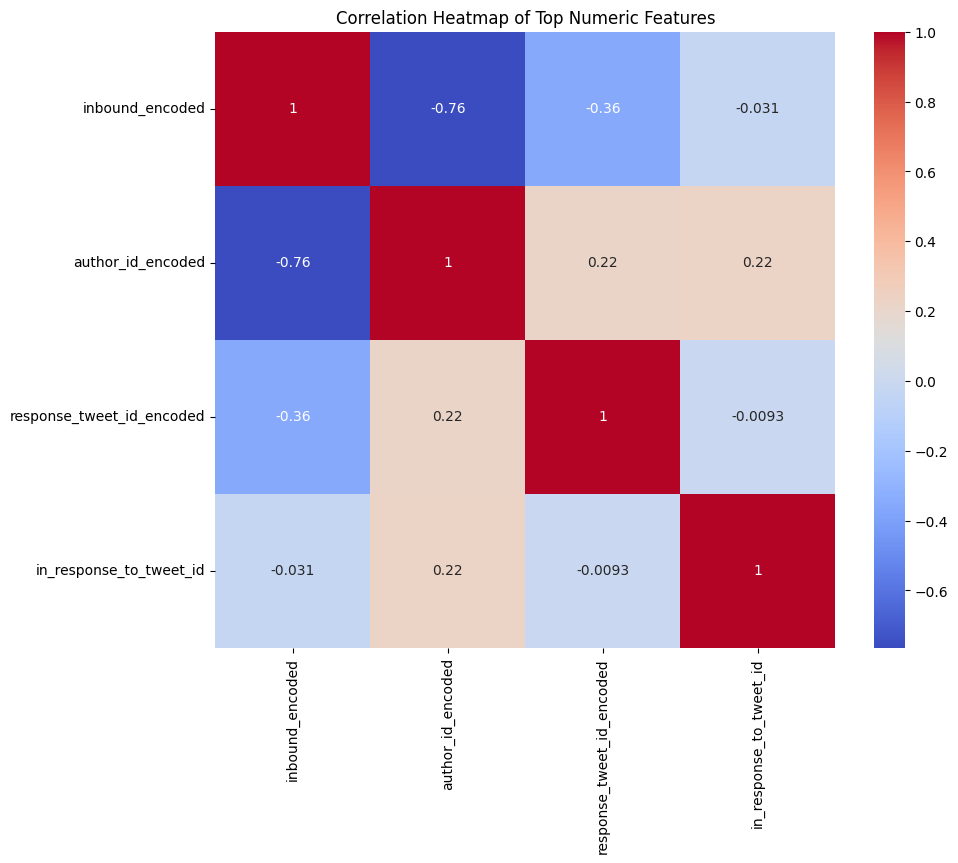

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the top features based on feature importance
# Select numerical features from the top importance list
top_n_features = importance_df.head(20)['Feature']
selected_numerical_data = data[top_n_features[top_n_features.isin(data.columns)]]

# Step 2: Compute correlations
correlation_matrix = selected_numerical_data.corr()

# Step 3: Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Numeric Features')
plt.show()
